#### Importation des librairies

In [1]:
# Importation des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import linear_model, tree, svm, ensemble 
from sklearn import model_selection
from sklearn import linear_model, tree, svm, ensemble
import time
from matplotlib import pyplot
from sklearn.compose import TransformedTargetRegressor



%matplotlib inline

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_colwidth', None)
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
# Importation des données dans des dataframe

data = pd.read_csv('cleaned_building-energy-benchmarking.csv', index_col=[0])

# Preprocessing

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1575 entries, 0 to 1697
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    1575 non-null   int64  
 1   DataYear                         1575 non-null   int64  
 2   BuildingType                     1575 non-null   object 
 3   PrimaryPropertyType              1575 non-null   object 
 4   PropertyName                     1575 non-null   object 
 5   Address                          1575 non-null   object 
 6   State                            1575 non-null   object 
 7   ZipCode                          1562 non-null   float64
 8   Neighborhood                     1575 non-null   object 
 9   Latitude                         1575 non-null   float64
 10  Longitude                        1575 non-null   float64
 11  ListOfAllPropertyUseTypes        1569 non-null   object 
 12  LargestPropertyUseTy

In [4]:
data.describe()

,OSEBuildingID,DataYear,ZipCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
count,1575.000000,1575.000000,1562.000000,1575.000000,1575.000000,1575.000000,1575.000000,1575.000000,1.575000e+03,1575.000000,1.575000e+03,1.565000e+03,855.000000,356.000000,1042.000000,1575.000000,1575.000000,1.575000e+03,1.575000e+03,1.575000e+03,1.575000e+03,1575.000000,1575.000000
mean,16487.760000,2015.982857,98116.768886,47.616492,-122.333496,1961.487619,1.159048,4.256508,1.209164e+05,14415.367619,1.065011e+05,1.001575e+05,36601.314793,14790.180616,63.021593,74.910476,183.274444,8.858683e+06,5.473360e+05,6.149722e+06,2.041839e+06,193.561146,1.557305
std,13812.544249,0.129845,18.623406,0.046851,0.023270,32.986381,2.917209,6.734122,3.041269e+05,44412.184721,2.890444e+05,2.846124e+05,66377.986913,36573.317797,28.431588,74.822791,186.179514,3.117209e+07,5.549832e+06,2.140776e+07,9.747677e+06,772.656653,2.337079
min,1.000000,2015.000000,98006.000000,47.509590,-122.411820,1900.000000,0.500000,0.000000,1.128500e+04,-1.000000,-8.451000e+03,6.455000e+03,0.000000,0.000000,1.000000,1.350000,0.000000,5.526710e+04,0.000000e+00,7.000000e+00,0.000000e+00,0.385000,0.005000
25%,603.500000,2016.000000,98104.000000,47.588057,-122.343095,1929.000000,1.000000,1.000000,2.881400e+04,0.000000,2.789200e+04,2.499000e+04,5819.500000,2582.875000,43.625000,34.900000,82.425000,1.238181e+06,0.000000e+00,7.401415e+05,0.000000e+00,20.610000,0.280000
50%,21182.000000,2016.000000,98109.000000,47.612750,-122.333190,1965.000000,1.000000,2.000000,4.817900e+04,0.000000,4.618300e+04,4.192000e+04,12610.000000,5965.500000,69.500000,54.200000,139.199997,2.679420e+06,0.000000e+00,1.756366e+06,4.821830e+05,50.935000,0.795000
75%,24614.000000,2016.000000,98125.000000,47.648750,-122.322630,1989.000000,1.000000,4.000000,1.079375e+05,0.000000,9.627700e+04,9.212900e+04,31996.000000,12535.250000,87.000000,86.024999,215.525002,7.310176e+06,0.000000e+00,5.254096e+06,1.525438e+06,145.440000,1.860000
max,50226.000000,2016.000000,98199.000000,47.733870,-122.261800,2015.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,639931.000000,459748.000000,100.000000,834.400024,2620.000000,8.739237e+08,1.314066e+08,6.570744e+08,2.979090e+08,16870.980000,34.090000


Comme nous souhaitons éviter les relevés de consommation annuels, on décide de ne pas prendre en compte les variables suivantes : SteamUse(kBtu), NaturalGas(kBtu), Electricity(kBtu)

In [5]:
data = data.drop(['SteamUse(kBtu)','Electricity(kBtu)',
                         'NaturalGas(kBtu)'], axis=1)
data_f = data.copy()
data_ESS = data_f.copy()

In [6]:
num_var = data.select_dtypes(include=['int64','float64'])
cat_var = data.select_dtypes(exclude=['int64','float64'])

## Préparation de l'encodage des variables catégorielles

In [7]:
cat_var.nunique()

BuildingType                       5
PrimaryPropertyType               22
PropertyName                    1571
Address                         1554
State                              1
Neighborhood                      19
ListOfAllPropertyUseTypes        375
LargestPropertyUseType            56
SecondLargestPropertyUseType      47
ThirdLargestPropertyUseType       39
YearsENERGYSTARCertified          64
dtype: int64

Pour la modélisation, nous pouvons écarter les variables suivantes pour simplifier la modélisation : 
- PropertyName
- Adress
- State
- LargestPropertyUseType
- SecondLargestPropertyUseType
- ThirdLargestPropertyUseType
- YearsENERGYSTARCertified

In [8]:
data_f.drop(["PropertyName",
                   "Address",
                   "State",
                   "LargestPropertyUseType",
                   "SecondLargestPropertyUseType",
                   "ThirdLargestPropertyUseType",
                   "YearsENERGYSTARCertified"], axis=1, inplace=True)
cat_var_f = cat_var.copy()
cat_var_f.drop(["PropertyName",
                   "Address",
                   "State",
                   "LargestPropertyUseType",
                   "SecondLargestPropertyUseType",
                   "ThirdLargestPropertyUseType",
                   "YearsENERGYSTARCertified"], axis=1, inplace=True)

ListOfAllPropertyUseTypes contient 375 valeurs distinctes ce qui est beaucoup. On va donc simplement compter le nombre d'utilisations distinctes et remplacer ces valeurs par le compte.

In [9]:
data_f['DistinctUsesNumber'] = [str(x).count(
    ",")+1 for x in data_f['ListOfAllPropertyUseTypes'].str.split(',')]
num_var = data_f.select_dtypes(include=['int64','float64'])

In [10]:
data_f = data_f.drop("ListOfAllPropertyUseTypes", axis=1)
cat_var_f = cat_var_f.drop("ListOfAllPropertyUseTypes", axis=1)

In [11]:
cat_var_f

,BuildingType,PrimaryPropertyType,Neighborhood
0,NonResidential,Retail Store,DOWNTOWN
1,NonResidential,Small- and Mid-Sized Office,DOWNTOWN
2,NonResidential,Large Office,LAKE UNION
3,NonResidential,Small- and Mid-Sized Office,GREATER DUWAMISH
4,NonResidential,Large Office,LAKE UNION
...,...,...,...
1692,Nonresidential COS,Other,DELRIDGE NEIGHBORHOODS
1694,Nonresidential COS,Other,DOWNTOWN
1695,Nonresidential COS,Other,MAGNOLIA / QUEEN ANNE
1696,Nonresidential COS,Mixed Use Property,GREATER DUWAMISH


## Préparation de la standardisation des variables numériques

In [12]:
# Taux de remplissage
import missingno as msno
missing = ((1 - num_var.isnull().mean())*100).sort_values(ascending=False)
#missing = raw_data.shape[0]-raw_data.isnull().sum().sort_values(ascending=True)
print(missing)

DistinctUsesNumber                 100.000000
GHGEmissionsIntensity              100.000000
DataYear                           100.000000
Latitude                           100.000000
Longitude                          100.000000
YearBuilt                          100.000000
NumberofBuildings                  100.000000
NumberofFloors                     100.000000
PropertyGFATotal                   100.000000
PropertyGFAParking                 100.000000
PropertyGFABuilding(s)             100.000000
SiteEUI(kBtu/sf)                   100.000000
SourceEUI(kBtu/sf)                 100.000000
SiteEnergyUse(kBtu)                100.000000
TotalGHGEmissions                  100.000000
OSEBuildingID                      100.000000
LargestPropertyUseTypeGFA           99.365079
ZipCode                             99.174603
ENERGYSTARScore                     66.158730
SecondLargestPropertyUseTypeGFA     54.285714
ThirdLargestPropertyUseTypeGFA      22.603175
dtype: float64


In [13]:
num_var.nunique()

OSEBuildingID                      1575
DataYear                              2
ZipCode                              48
Latitude                           1416
Longitude                          1332
YearBuilt                           113
NumberofBuildings                    20
NumberofFloors                       45
PropertyGFATotal                   1499
PropertyGFAParking                  359
PropertyGFABuilding(s)             1493
LargestPropertyUseTypeGFA          1471
SecondLargestPropertyUseTypeGFA     708
ThirdLargestPropertyUseTypeGFA      308
ENERGYSTARScore                     193
SiteEUI(kBtu/sf)                   1507
SourceEUI(kBtu/sf)                 1548
SiteEnergyUse(kBtu)                1575
TotalGHGEmissions                  1557
GHGEmissionsIntensity               690
DistinctUsesNumber                   11
dtype: int64

Pour la modélisation, nous pouvons écarter les variables suivantes pour simplifier la modélisation : 
- OSEBuildingID
- DataYear
- ZipCode
- Latitude
- Longitude

Ainsi que : 
- SecondLargestPropertyUseTypeGFA
- ThirdLargestPropertyUseTypeGFA 
qui présentent des taux de remplissage relativement faibles

Et : 
- PropertyGFABuilding(s)
- LargestPropertyUseTypeGFA
- SourceEUI(kBtu/sf)
Qui sont fortement corrélées à PropertyGFATotal (on ne garde que celle-ci)

Enfin, on supprime également TotalGHGEmissions car on n'étudiera seulement SiteEnergyUse(kBtu).

In [14]:
data_f

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,ZipCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DistinctUsesNumber
0,325,2015,NonResidential,Retail Store,98101.0,DOWNTOWN,47.611711,-122.336816,1989.0,1.0,4.0,111077.0,0.0,111077.0,NaN,NaN,NaN,91.0,60.600000,190.200000,9.898724e+06,69.01,0.24,1
1,400,2015,NonResidential,Small- and Mid-Sized Office,98101.0,DOWNTOWN,47.606799,-122.337100,1906.0,1.0,6.0,98370.0,25920.0,72450.0,98370.0,NaN,NaN,45.0,66.300000,207.500000,6.525887e+06,47.24,0.20,1
2,442,2015,NonResidential,Large Office,98109.0,LAKE UNION,47.621476,-122.343050,1947.0,1.0,4.0,193788.0,37854.0,155934.0,138672.0,47539.0,11166.0,59.0,105.800000,332.300000,1.676022e+07,116.84,0.23,5
3,499,2015,NonResidential,Small- and Mid-Sized Office,98144.0,GREATER DUWAMISH,47.570897,-122.297412,2008.0,1.0,3.0,76598.0,21410.0,55188.0,55188.0,21410.0,NaN,76.0,81.100000,169.800000,4.476997e+06,134.69,1.63,2
4,559,2015,NonResidential,Large Office,98109.0,LAKE UNION,47.621243,-122.329786,1981.0,1.0,4.0,186971.0,0.0,186971.0,186977.0,115477.0,NaN,86.0,67.700000,179.100000,1.266246e+07,226.92,0.99,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1692,50221,2016,Nonresidential COS,Other,NaN,DELRIDGE NEIGHBORHOODS,47.540670,-122.374410,1982.0,1.0,1.0,18261.0,0.0,18261.0,18261.0,NaN,NaN,NaN,51.000000,126.000000,9.320821e+05,20.33,1.11,1
1694,50223,2016,Nonresidential COS,Other,NaN,DOWNTOWN,47.596250,-122.322830,2004.0,1.0,1.0,16000.0,0.0,16000.0,16000.0,NaN,NaN,NaN,59.400002,114.199997,9.502762e+05,32.17,2.01,1
1695,50224,2016,Nonresidential COS,Other,NaN,MAGNOLIA / QUEEN ANNE,47.636440,-122.357840,1974.0,1.0,1.0,13157.0,0.0,13157.0,7583.0,5574.0,0.0,NaN,438.200012,744.799988,5.765898e+06,223.54,16.99,3
1696,50225,2016,Nonresidential COS,Mixed Use Property,NaN,GREATER DUWAMISH,47.528320,-122.324310,1989.0,1.0,1.0,14101.0,0.0,14101.0,6601.0,6501.0,484.0,NaN,51.000000,105.300003,7.194712e+05,22.11,1.57,5


In [15]:
data_f.drop(["OSEBuildingID", "DataYear",
             "ZipCode",
             "Latitude",
             "Longitude",
             "SecondLargestPropertyUseTypeGFA",
             "ThirdLargestPropertyUseTypeGFA",
             "TotalGHGEmissions",
             "PropertyGFABuilding(s)",
             "LargestPropertyUseTypeGFA",
             "SourceEUI(kBtu/sf)"], axis=1, inplace=True)
num_var_f = num_var.copy()
num_var_f.drop(["OSEBuildingID", "DataYear",
                "ZipCode",
                "Latitude",
                "Longitude",
                "SecondLargestPropertyUseTypeGFA",
                "ThirdLargestPropertyUseTypeGFA",
                "TotalGHGEmissions",
                "SiteEnergyUse(kBtu)",
                "PropertyGFABuilding(s)",
                "LargestPropertyUseTypeGFA",
                "SourceEUI(kBtu/sf)"], axis=1, inplace=True)

In [16]:
num_var_f

,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,ENERGYSTARScore,SiteEUI(kBtu/sf),GHGEmissionsIntensity,DistinctUsesNumber
0,1989.0,1.0,4.0,111077.0,0.0,91.0,60.600000,0.24,1
1,1906.0,1.0,6.0,98370.0,25920.0,45.0,66.300000,0.20,1
2,1947.0,1.0,4.0,193788.0,37854.0,59.0,105.800000,0.23,5
3,2008.0,1.0,3.0,76598.0,21410.0,76.0,81.100000,1.63,2
4,1981.0,1.0,4.0,186971.0,0.0,86.0,67.700000,0.99,2
...,...,...,...,...,...,...,...,...,...
1692,1982.0,1.0,1.0,18261.0,0.0,NaN,51.000000,1.11,1
1694,2004.0,1.0,1.0,16000.0,0.0,NaN,59.400002,2.01,1
1695,1974.0,1.0,1.0,13157.0,0.0,NaN,438.200012,16.99,3
1696,1989.0,1.0,1.0,14101.0,0.0,NaN,51.000000,1.57,5


In [17]:
data_f

,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),GHGEmissionsIntensity,DistinctUsesNumber
0,NonResidential,Retail Store,DOWNTOWN,1989.0,1.0,4.0,111077.0,0.0,91.0,60.600000,9.898724e+06,0.24,1
1,NonResidential,Small- and Mid-Sized Office,DOWNTOWN,1906.0,1.0,6.0,98370.0,25920.0,45.0,66.300000,6.525887e+06,0.20,1
2,NonResidential,Large Office,LAKE UNION,1947.0,1.0,4.0,193788.0,37854.0,59.0,105.800000,1.676022e+07,0.23,5
3,NonResidential,Small- and Mid-Sized Office,GREATER DUWAMISH,2008.0,1.0,3.0,76598.0,21410.0,76.0,81.100000,4.476997e+06,1.63,2
4,NonResidential,Large Office,LAKE UNION,1981.0,1.0,4.0,186971.0,0.0,86.0,67.700000,1.266246e+07,0.99,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1692,Nonresidential COS,Other,DELRIDGE NEIGHBORHOODS,1982.0,1.0,1.0,18261.0,0.0,NaN,51.000000,9.320821e+05,1.11,1
1694,Nonresidential COS,Other,DOWNTOWN,2004.0,1.0,1.0,16000.0,0.0,NaN,59.400002,9.502762e+05,2.01,1
1695,Nonresidential COS,Other,MAGNOLIA / QUEEN ANNE,1974.0,1.0,1.0,13157.0,0.0,NaN,438.200012,5.765898e+06,16.99,3
1696,Nonresidential COS,Mixed Use Property,GREATER DUWAMISH,1989.0,1.0,1.0,14101.0,0.0,NaN,51.000000,7.194712e+05,1.57,5


## Fonction de preprocessing

In [18]:
numeric_features = list(num_var_f.columns)
categorical_features = list(cat_var_f.columns)
selected_features = numeric_features+categorical_features

selected_features

['YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'ENERGYSTARScore',
 'SiteEUI(kBtu/sf)',
 'GHGEmissionsIntensity',
 'DistinctUsesNumber',
 'BuildingType',
 'PrimaryPropertyType',
 'Neighborhood']

In [19]:
def preprocess_data(data, num_var, cat_var, scaler = None):
    from sklearn import preprocessing
    #pipeline = Pipeline([('scaler', StandardScaler()), ('classifier', DecisionTreeClassifier())])
    df_num = data[num_var]
    if scaler == None : 
        scaler = preprocessing.MaxAbsScaler().fit(df_num)

    
    df_num = scaler.transform(df_num)
    df_num = pd.DataFrame(df_num, columns = num_var, index = data.index)

    df_cat = data[cat_var]
    #df_cat = df_cat.applymap(str)
    #df_cat = pd.get_dummies(df_cat, prefix = df_cat.columns)
    
    for col in cat_var:
        df_cat[col] = preprocessing.LabelEncoder().fit_transform(df_cat[col])
    
    data = pd.concat([df_num, df_cat], axis=1)


    return(data, scaler)

## Valeurs manquantes

In [20]:
# Imputation des valeurs manquantes par la moyenne
data_f.fillna(data_f.mean(), inplace=True)

## Séparation Features / Labels

In [21]:
# Créer la matrice de données
from sklearn import model_selection
X = data_f.drop('SiteEnergyUse(kBtu)', axis=1)

# Créer le vecteur d'étiquettes
y = data_f['SiteEnergyUse(kBtu)']

## Séparation données Entraînement / Test

In [22]:
# Créer un jeu d'entrainement et un jeu de test
X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y,
                                     test_size=0.3  # 30% des données dans le jeu de test
                                     )

print("Taille du jeu d'entraînement : "+str(X_train.shape)+"\nTaille du jeu de test : "+str(X_test.shape))

Taille du jeu d'entraînement : (1102, 12)
Taille du jeu de test : (473, 12)


## Standardisation des données

In [23]:
X_train_std = preprocess_data(X_train, numeric_features, categorical_features)[0]
scaler = preprocess_data(X_train, numeric_features, categorical_features)[1]

X_test_std = preprocess_data(X_test, numeric_features, categorical_features, scaler=scaler)[0]

# Model fitting sans transformation des données

## Choix des hyperparamètres

- La liste des hyperparmetres proposés vient des recommendations des concepteurs des librairies + la pratique courante.
- Les hyperparmetres des modèles sont selectionnés via validation croisée sur le train. Puis le modèle final est selectionné en évaluant ses performances sur le jeu de validation.

## Fonction d'évaluation des modèles

In [24]:
def model_eval(regressor, X_train, y_train, X_test, y_test):

    # List of Regressor Objects
    regressors = [
        regressor
    ]

    # Logging for Visual Comparison
    log_cols = ["Regressor", "Explained Variance",
                #"RMSE Loss", "MAE",
                "R2 Score", "Training Time", "Best Hyperparameters"]
    log = pd.DataFrame(columns=log_cols)

    if not('log_total' in globals()):
        global log_total
        log_total = pd.DataFrame(columns=log_cols)
    else:
        log_total = log_total.copy()

    for reg in regressors:

        name = reg.__class__.__name__

        # Hyperparameter tuning for each regressor
        if name == "LinearRegression":
            space = dict()
            space['fit_intercept'] = [True, False]
            space['normalize'] = [True, False]

        if name == "ElasticNet":
            space = dict()
            space['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
            space['l1_ratio'] = np.arange(0.0, 1.1, 0.1)
            space['max_iter'] = [10, 100, 1000]

        if name == "LinearSVR":
            space = dict()
            space['epsilon'] = [0, 0.01, 0.1, 0.5, 1, 2]
            space['C'] = np.logspace(-4, 2, 7)
            space['loss'] = ["epsilon_insensitive",
                             "squared_epsilon_insensitive"]
            space['max_iter'] = [10, 100, 1000]

        if name == "RandomForestRegressor":
            space = dict()
            space['max_features'] = ['sqrt', 'log2']
            space['max_depth'] = [5, 15, 25, 50]
            space['min_samples_split'] = [2, 5, 10]
            space['min_samples_leaf'] = [1, 2, 5, 10]

        if name == "GradientBoostingRegressor":
            space = dict()
            space['learning_rate'] = [0.001, 0.01, 0.1, 0.2, 0, 3]
            space['max_depth'] = [6, 10, 15, 20]
            space['n_estimators'] = [25, 50, 100, 500, 1000]

        if name == "DummyRegressor":
            space = dict()
            space['strategy'] = ['mean', 'median']

            
            
        # define cross validation
        cv = model_selection.RepeatedKFold(
            n_splits=10, n_repeats=3, random_state=1)

        # define scoring
        score = 'explained_variance'

        # define search
        search = model_selection.GridSearchCV(
            reg, space, scoring=score, n_jobs=-1, cv=cv)

        # model fitting
        start_time = time.time()
        result = search.fit(X_train, y_train)
        training_time = time.time() - start_time

        print("="*30)
        print(name)
        print('\nBest Score to optimize: '+score+' = %s' % result.best_score_)
        print('Best Hyperparameters: %s' % result.best_params_)

        print('\n****Results****')
        predictions = result.predict(X_test)

        # metrics
        #rmse = np.sqrt(sklearn.metrics.mean_squared_error(y_test, predictions))
        #mae = sklearn.metrics.mean_absolute_error(y_test, predictions)
        explained_variance = result.best_score_
        r2 = sklearn.metrics.r2_score(y_test, predictions)

        #print("Root Mean Squared Error: {}".format(rmse))
        #print("Mean Absolute Error: {}".format(mae))
        print("Explained Variance: {}".format(explained_variance))
        print("R2 Score: {}".format(r2))
        print("Training time: {}s".format(round(training_time, 2)))

        log_entry = pd.DataFrame(
            [[name, explained_variance,
              #rmse, mae,
              r2, round(training_time, 3), result.best_params_]], columns=log_cols)
        log = log.append(log_entry)
        log_total = log_total.append(log_entry)
        log_total.drop_duplicates(
            subset=['Regressor'], keep='last', inplace=True)

        print("="*30)

        display(log.sort_values(by='Explained Variance'))
        

        # GRAPHS
        fig = plt.figure(figsize=(14, 8))
        
        # plot valeurs réelles / valeurs prédites
        X_plot = [y_test.min(), y_test.max()]
        plt.subplot(1,2,1)
        plt.scatter(y_test, predictions, alpha=.6)
        plt.plot(X_plot, X_plot, color='r')
        plt.title("Valeurs prédites VS valeurs réelles")
        plt.xlabel("Valeurs réelles")
        plt.ylabel("Valeurs prédites")

        # Features importance
        if name in ["LinearRegression", "ElasticNet", "LinearSVR"]:
            feature_importance = np.abs(search.best_estimator_.coef_)
            sorted_idx = np.argsort(feature_importance)
            pos = np.arange(sorted_idx.shape[0]) + .5
            plt.subplot(1, 2, 2)
            plt.barh(pos, feature_importance[sorted_idx], align='center')
            plt.yticks(pos, np.array(X_train.columns)[sorted_idx])
            plt.title('Importance des variables')

        if name in ["RandomForestRegressor", "GradientBoostingRegressor"]:
            feature_importance = search.best_estimator_.feature_importances_
            sorted_idx = np.argsort(feature_importance)
            pos = np.arange(sorted_idx.shape[0]) + .5
            plt.subplot(1, 2, 2)
            plt.barh(pos, feature_importance[sorted_idx], align='center')
            plt.yticks(pos, np.array(X_train.columns)[sorted_idx])
            plt.title('Importance des variables')

        fig.tight_layout()
        plt.show()

## Modèles linéaires

### Baseline - Régression linéaire multivariée

- Cross validation
- GridSearch

LinearRegression

Best Score to optimize: explained_variance = 0.5328286259286927
Best Hyperparameters: {'fit_intercept': False, 'normalize': True}

****Results****
Explained Variance: 0.5328286259286927
R2 Score: 0.4223548035892588
Training time: 1.37s


,Regressor,Explained Variance,R2 Score,Training Time,Best Hyperparameters
0,LinearRegression,0.532829,0.422355,1.371,"{'fit_intercept': False, 'normalize': True}"


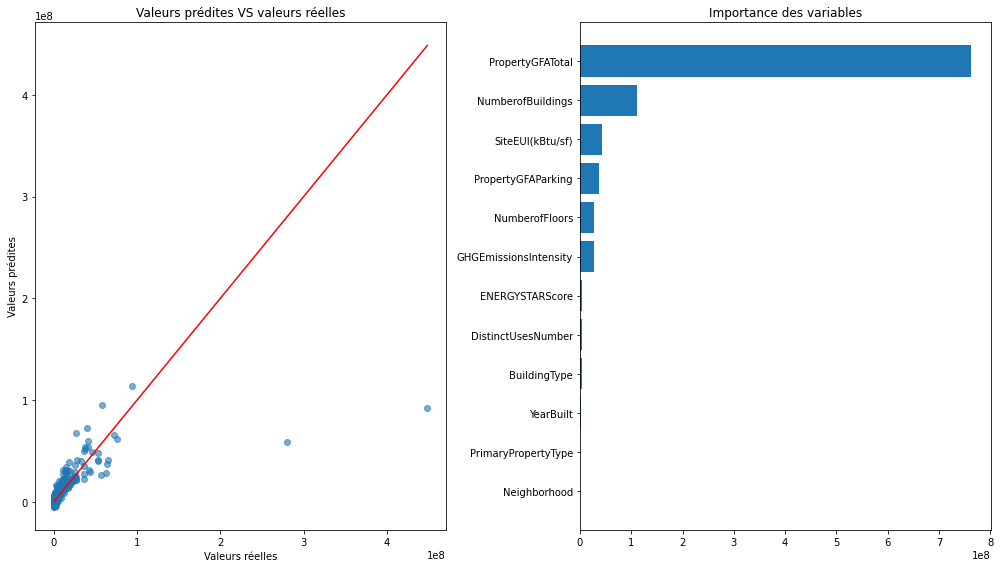

In [25]:
model_eval(linear_model.LinearRegression(), X_train_std, y_train, X_test_std, y_test)

### ElasticNet

ElasticNet

Best Score to optimize: explained_variance = 0.5889261651329449
Best Hyperparameters: {'alpha': 0.001, 'l1_ratio': 0.9, 'max_iter': 10}

****Results****
Explained Variance: 0.5889261651329449
R2 Score: 0.4148848869815349
Training time: 5.74s


/Users/louisrageot/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0647510466849202e+17, tolerance: 119324390020296.06
  model = cd_fast.enet_coordinate_descent(


,Regressor,Explained Variance,R2 Score,Training Time,Best Hyperparameters
0,ElasticNet,0.588926,0.414885,5.742,"{'alpha': 0.001, 'l1_ratio': 0.9, 'max_iter': 10}"


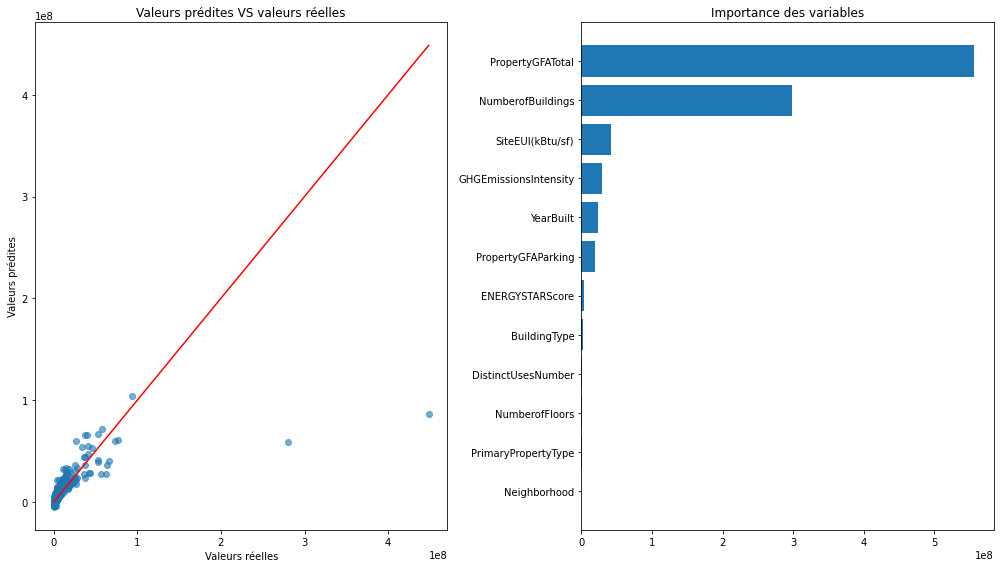

In [26]:
model_eval(linear_model.ElasticNet(), X_train_std, y_train, X_test_std, y_test)

### SVR

LinearSVR

Best Score to optimize: explained_variance = 0.5554366394491593
Best Hyperparameters: {'C': 1.0, 'epsilon': 0, 'loss': 'squared_epsilon_insensitive', 'max_iter': 1000}

****Results****
Explained Variance: 0.5554366394491593
R2 Score: 0.41072844991157587
Training time: 10.3s


/Users/louisrageot/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


,Regressor,Explained Variance,R2 Score,Training Time,Best Hyperparameters
0,LinearSVR,0.555437,0.410728,10.297,"{'C': 1.0, 'epsilon': 0, 'loss': 'squared_epsilon_insensitive', 'max_iter': 1000}"


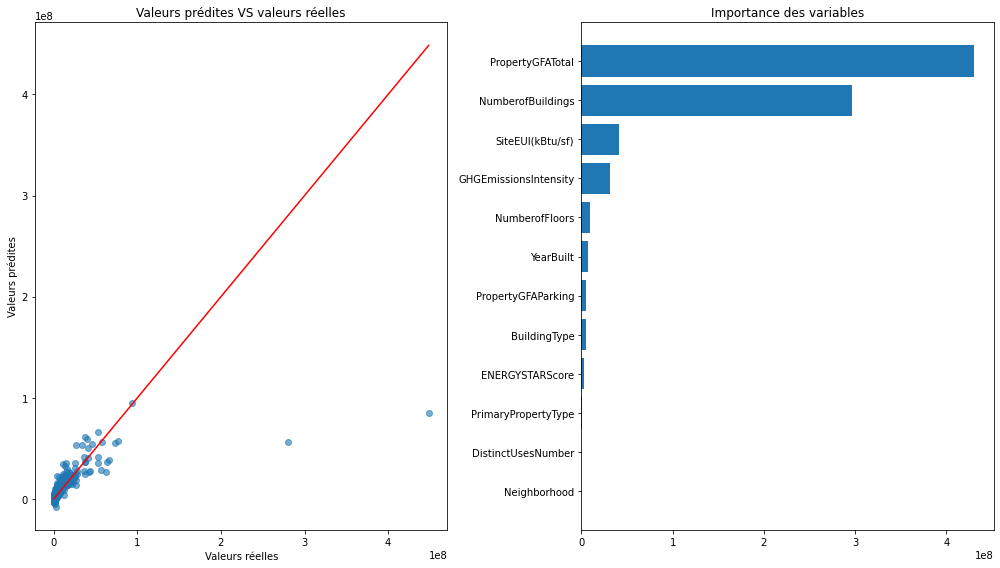

In [27]:
model_eval(svm.LinearSVR(), X_train_std, y_train, X_test_std, y_test)

## Modèle non-linéaires
### RandomForest

RandomForestRegressor

Best Score to optimize: explained_variance = 0.708399068070345
Best Hyperparameters: {'max_depth': 25, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}

****Results****
Explained Variance: 0.708399068070345
R2 Score: 0.4344708391078992
Training time: 74.6s


,Regressor,Explained Variance,R2 Score,Training Time,Best Hyperparameters
0,RandomForestRegressor,0.708399,0.434471,74.6,"{'max_depth': 25, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}"


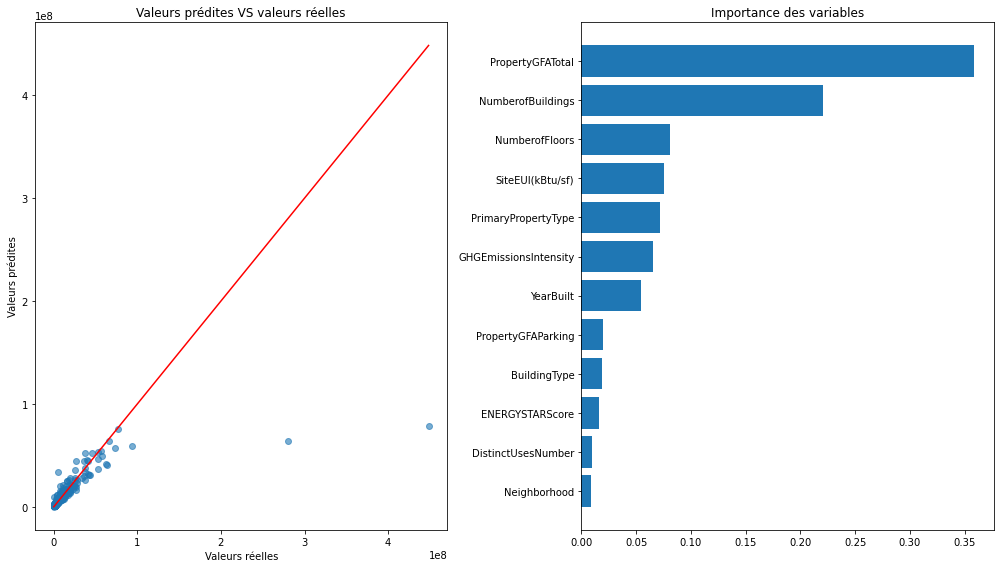

In [28]:
model_eval(ensemble.RandomForestRegressor(), X_train_std, y_train, X_test_std, y_test)

### Gradient Boosting

In [29]:
#model_eval(ensemble.GradientBoostingRegressor(), X_train_std, y_train_std, X_test_std, y_test_std)

## Comparaison avec une approche naïve

DummyRegressor

Best Score to optimize: explained_variance = 7.401486830834377e-18
Best Hyperparameters: {'strategy': 'median'}

****Results****
Explained Variance: 7.401486830834377e-18
R2 Score: -0.048785947404933916
Training time: 0.04s


,Regressor,Explained Variance,R2 Score,Training Time,Best Hyperparameters
0,DummyRegressor,7.401487e-18,-0.048786,0.042,{'strategy': 'median'}


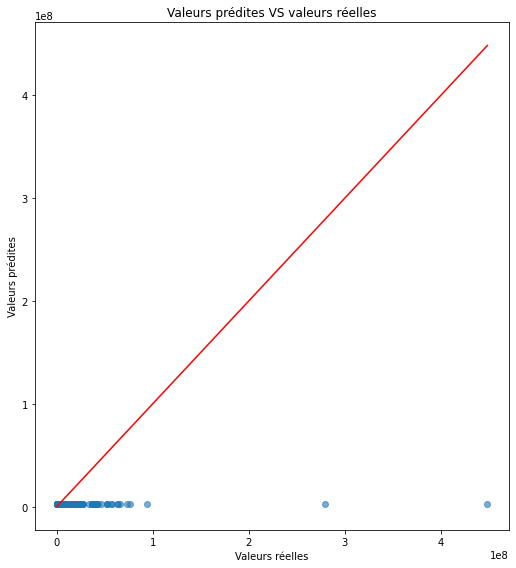

In [30]:
from sklearn import dummy
model_eval(dummy.DummyRegressor(), X_train_std, y_train, X_test_std, y_test)

## Comparaison des résultats

,Regressor,Explained Variance,R2 Score,Training Time,Best Hyperparameters
0,RandomForestRegressor,7.083991e-01,0.434471,74.600,"{'max_depth': 25, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}"
0,ElasticNet,5.889262e-01,0.414885,5.742,"{'alpha': 0.001, 'l1_ratio': 0.9, 'max_iter': 10}"
0,LinearSVR,5.554366e-01,0.410728,10.297,"{'C': 1.0, 'epsilon': 0, 'loss': 'squared_epsilon_insensitive', 'max_iter': 1000}"
0,LinearRegression,5.328286e-01,0.422355,1.371,"{'fit_intercept': False, 'normalize': True}"
0,DummyRegressor,7.401487e-18,-0.048786,0.042,{'strategy': 'median'}


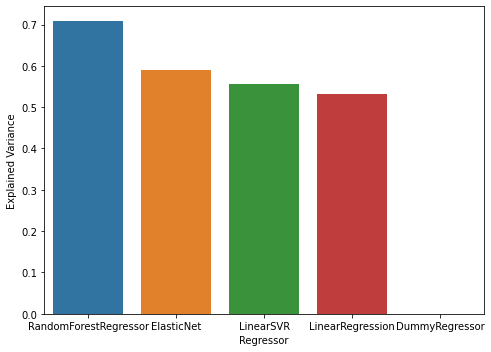

In [31]:
plt.figure(figsize=(7,5))
display(log_total.sort_values(by="Explained Variance", ascending=False))
sns.barplot(data=log_total.sort_values(by="Explained Variance", ascending=False), x="Regressor",y="Explained Variance")
plt.tight_layout()

# Model fitting avec transformation au logarithme

## Fonction d'évaluation avec transformation au log

In [32]:
def model_eval_log(regressor, X_train, y_train, X_test, y_test):

    # List of Regressor Objects
    regressors = [
        regressor
    ]

    # Logging for Visual Comparison
    log_cols = ["Regressor", "Explained Variance",
                #"RMSE Loss", "MAE",
                "R2 Score", "Training Time", "Best Hyperparameters"]
    log = pd.DataFrame(columns=log_cols)

    if not('log_total_log' in globals()):
        global log_total_log
        log_total_log = pd.DataFrame(columns=log_cols)
    else:
        log_total_log = log_total_log.copy()

    for reg in regressors:

        name = reg.__class__.__name__

        # Hyperparameter tuning for each regressor
        if name == "LinearRegression":
            space = dict()
            space['fit_intercept'] = [True, False]
            space['normalize'] = [True, False]

        if name == "ElasticNet":
            space = dict()
            space['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
            space['l1_ratio'] = np.arange(0.0, 1.1, 0.1)
            space['max_iter'] = [10, 100, 1000]

        if name == "LinearSVR":
            space = dict()
            space['epsilon'] = [0, 0.01, 0.1, 0.5, 1, 2]
            space['C'] = np.logspace(-4, 2, 7)
            space['loss'] = ["epsilon_insensitive",
                             "squared_epsilon_insensitive"]
            space['max_iter'] = [10, 100, 1000]

        if name == "RandomForestRegressor":
            space = dict()
            space['max_features'] = ['sqrt', 'log2']
            space['max_depth'] = [5, 15, 25, 50]
            space['min_samples_split'] = [2, 5, 10]
            space['min_samples_leaf'] = [1, 2, 5, 10]

        if name == "GradientBoostingRegressor":
            space = dict()
            space['learning_rate'] = [0.001, 0.01, 0.1, 0.2, 0, 3]
            space['max_depth'] = [6, 10, 15, 20]
            space['n_estimators'] = [25, 50, 100, 500, 1000]

        if name == "DummyRegressor":
            space = dict()
            space['strategy'] = ['mean', 'median']

        # define cross validation
        cv = model_selection.RepeatedKFold(
            n_splits=10, n_repeats=3, random_state=1)

        # define scoring
        score = 'explained_variance'

        # define search
        #search = TransformedTargetRegressor(model_selection.GridSearchCV(
        #    reg, space, scoring=score, n_jobs=-1, cv=cv), func=np.log, inverse_func=np.exp)
        search = model_selection.GridSearchCV(
            reg, space, scoring=score, n_jobs=-1, cv=cv)

        # model fitting
        start_time = time.time()
        result = search.fit(X_train, y_train)
        training_time = time.time() - start_time

        print("="*30)
        print(name)
        print('\nBest Score to optimize: '+score+' = %s' %
              result.best_score_)
        print('Best Hyperparameters: %s' % result.best_params_)

        print('\n****Results****')
        predictions = result.predict(X_test)
        
        ###
        #display(predictions)
        ###

        # metrics
        #rmse = np.sqrt(sklearn.metrics.mean_squared_error(y_test, predictions))
        #mae = sklearn.metrics.mean_absolute_error(y_test, predictions)
        explained_variance = result.best_score_
        r2 = sklearn.metrics.r2_score(y_test, predictions)

        #print("Root Mean Squared Error: {}".format(rmse))
        #print("Mean Absolute Error: {}".format(mae))
        print("R2 Score: {}".format(r2))
        print("Training time: {}s".format(round(training_time, 2)))

        log_entry = pd.DataFrame(
            [[name, explained_variance,
              #rmse, mae,
              r2, round(training_time, 3), result.best_params_]], columns=log_cols)
        log = log.append(log_entry)
        log_total_log = log_total_log.append(log_entry)
        log_total_log.drop_duplicates(
            subset=['Regressor'], keep='last', inplace=True)
        
        #best_model = 

        print("="*30)

        display(log.sort_values(by='Explained Variance'))

        # plot valeurs réelles / valeurs prédites
        X_plot = [y_test.min(), y_test.max()]
        fig = plt.figure(figsize=(14, 8))
        plt.subplot(1, 2, 1)
        plt.scatter(y_test, predictions, alpha=.6)
        plt.plot(X_plot, X_plot, color='r')
        plt.title("Valeurs prédites VS valeurs réelles")
        plt.xlabel("Valeurs réelles")
        plt.ylabel("Valeurs prédites")

        # Features importance
        if name in ["LinearRegression", "ElasticNet", "LinearSVR"]:
            feature_importance = np.abs(
            search.best_estimator_.coef_)
            sorted_idx = np.argsort(feature_importance)
            pos = np.arange(sorted_idx.shape[0]) + .5
            plt.subplot(1, 2, 2)
            plt.barh(pos, feature_importance[sorted_idx], align='center')
            plt.yticks(pos, np.array(X_train.columns)[sorted_idx])
            plt.title('Importance des variables')

        if name in ["RandomForestRegressor", "GradientBoostingRegressor"]:
            feature_importance = search.best_estimator_.feature_importances_
            sorted_idx = np.argsort(feature_importance)
            pos = np.arange(sorted_idx.shape[0]) + .5
            plt.subplot(1, 2, 2)
            plt.barh(pos, feature_importance[sorted_idx], align='center')
            plt.yticks(pos, np.array(X_train.columns)[sorted_idx])
            plt.title('Importance des variables')

        fig.tight_layout()
        plt.show()

## Modèles linéaires

In [33]:
y_train = np.log(y_train)
y_test = np.log(y_test)

### Baseline - Régression linéaire multivariée

LinearRegression

Best Score to optimize: explained_variance = 0.43232398774822
Best Hyperparameters: {'fit_intercept': True, 'normalize': False}

****Results****
R2 Score: 0.6563032812403108
Training time: 0.1s


,Regressor,Explained Variance,R2 Score,Training Time,Best Hyperparameters
0,LinearRegression,0.432324,0.656303,0.103,"{'fit_intercept': True, 'normalize': False}"


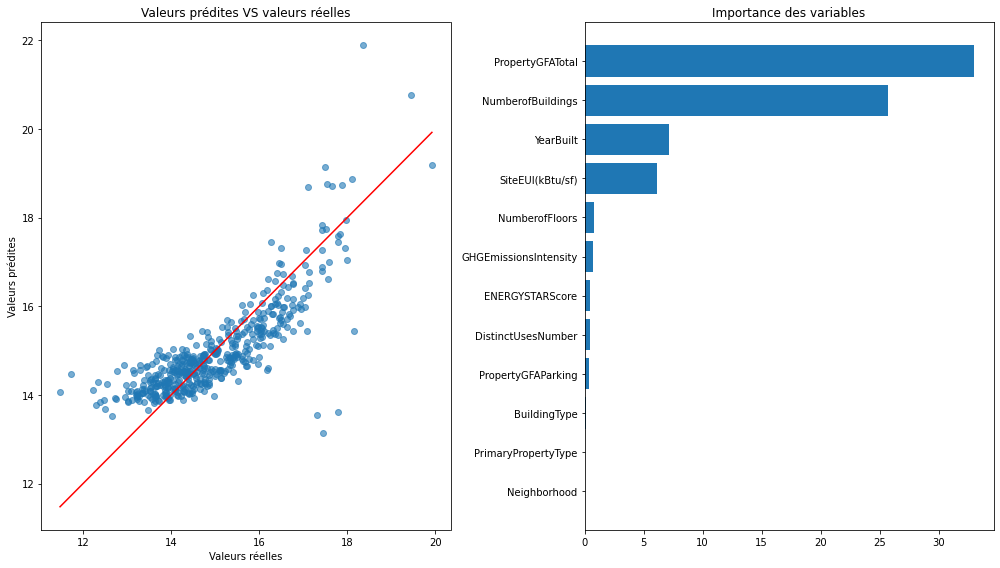

In [34]:
model_eval_log(linear_model.LinearRegression(), X_train_std, y_train, X_test_std, y_test)

### ElasticNet

ElasticNet

Best Score to optimize: explained_variance = 0.5785380700624543
Best Hyperparameters: {'alpha': 0.001, 'l1_ratio': 0.30000000000000004, 'max_iter': 10}

****Results****
R2 Score: 0.6412382843384921
Training time: 4.97s


,Regressor,Explained Variance,R2 Score,Training Time,Best Hyperparameters
0,ElasticNet,0.578538,0.641238,4.965,"{'alpha': 0.001, 'l1_ratio': 0.30000000000000004, 'max_iter': 10}"


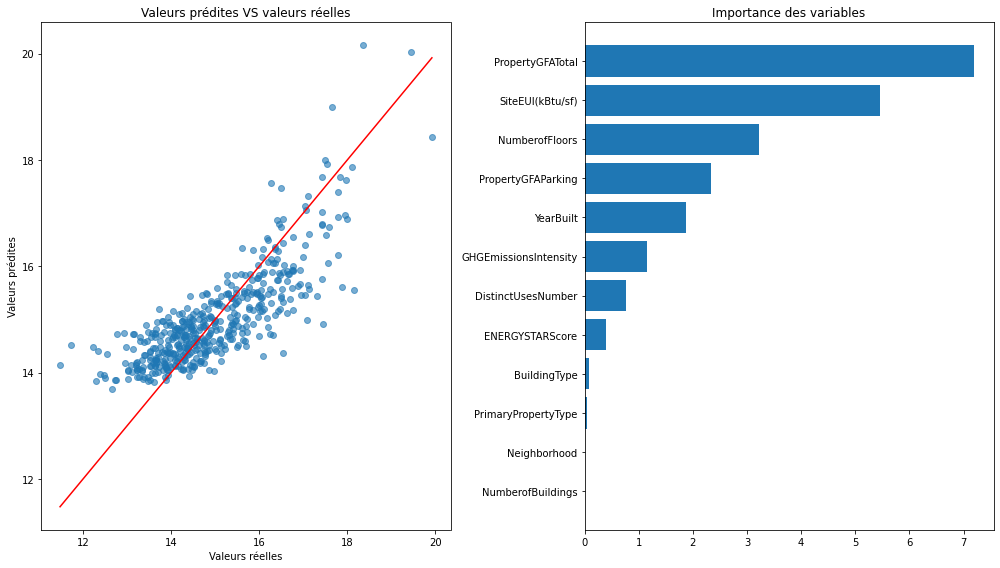

In [35]:
model_eval_log(linear_model.ElasticNet(), X_train_std, y_train, X_test_std, y_test)

### SVR

LinearSVR

Best Score to optimize: explained_variance = 0.5818507452865916
Best Hyperparameters: {'C': 1.0, 'epsilon': 0, 'loss': 'squared_epsilon_insensitive', 'max_iter': 1000}

****Results****
R2 Score: 0.6566961325006062
Training time: 12.67s


/Users/louisrageot/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


,Regressor,Explained Variance,R2 Score,Training Time,Best Hyperparameters
0,LinearSVR,0.581851,0.656696,12.675,"{'C': 1.0, 'epsilon': 0, 'loss': 'squared_epsilon_insensitive', 'max_iter': 1000}"


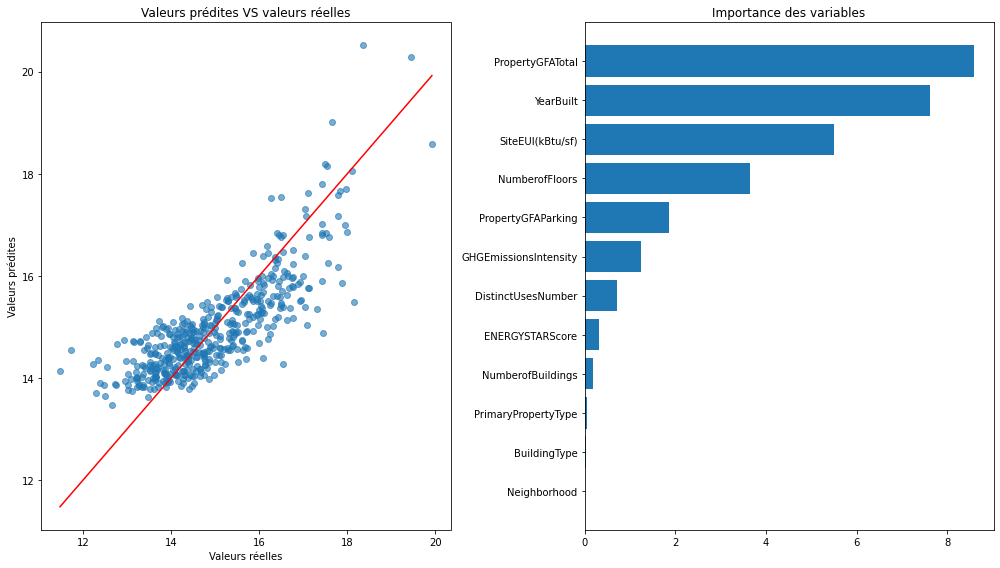

In [36]:
model_eval_log(svm.LinearSVR(), X_train_std, y_train, X_test_std, y_test)

## Modèle non-linéaires
### RandomForest

RandomForestRegressor

Best Score to optimize: explained_variance = 0.9449372171041807
Best Hyperparameters: {'max_depth': 25, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}

****Results****
R2 Score: 0.9512001667731063
Training time: 69.72s


,Regressor,Explained Variance,R2 Score,Training Time,Best Hyperparameters
0,RandomForestRegressor,0.944937,0.9512,69.718,"{'max_depth': 25, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}"


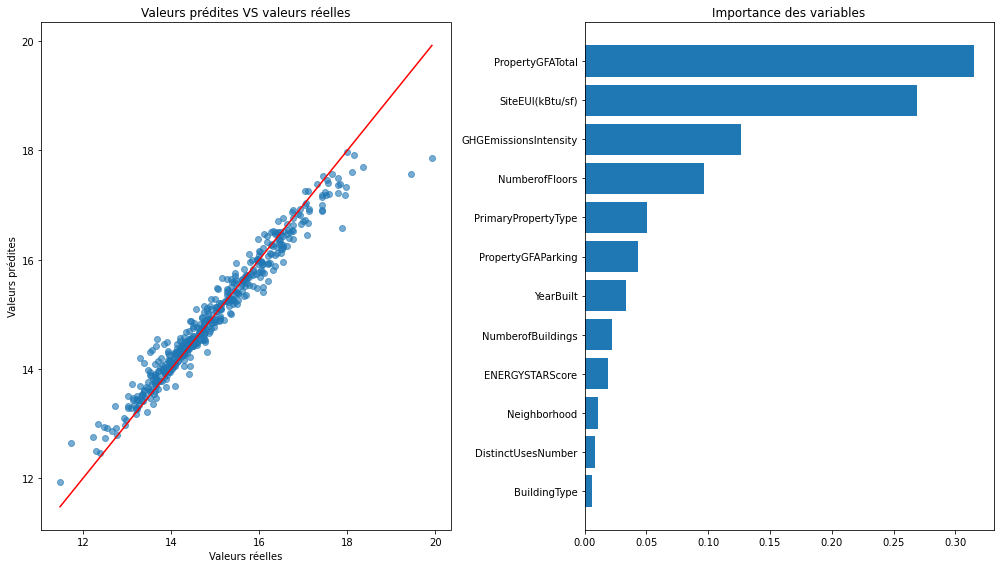

In [37]:
model_eval_log(ensemble.RandomForestRegressor(), X_train_std, y_train, X_test_std, y_test)

### Gradient Boosting

In [38]:
#model_eval_log(ensemble.GradientBoostingRegressor(), X_train_std, y_train, X_test_std, y_test)

## Comparaison avec une approche naïve

DummyRegressor

Best Score to optimize: explained_variance = 1.4802973661668754e-17
Best Hyperparameters: {'strategy': 'median'}

****Results****
R2 Score: -0.006540493704401351
Training time: 0.04s


,Regressor,Explained Variance,R2 Score,Training Time,Best Hyperparameters
0,DummyRegressor,1.480297e-17,-0.00654,0.041,{'strategy': 'median'}


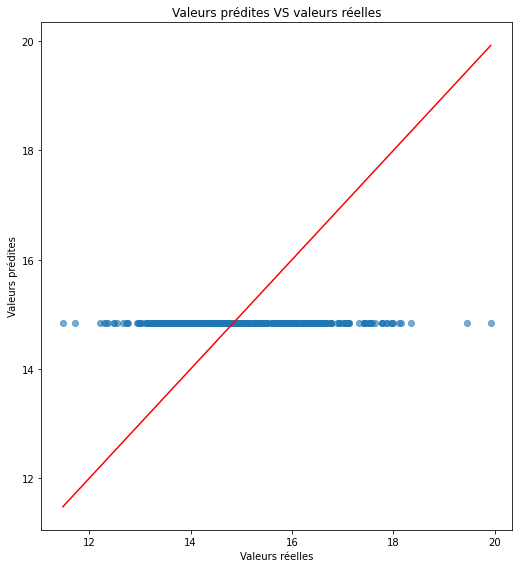

In [39]:
from sklearn import dummy
model_eval_log(dummy.DummyRegressor(), X_train_std, y_train, X_test_std, y_test)

## Comparaison des résultats

,Regressor,Explained Variance,R2 Score,Training Time,Best Hyperparameters
0,RandomForestRegressor,9.449372e-01,0.951200,69.718,"{'max_depth': 25, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}"
0,LinearSVR,5.818507e-01,0.656696,12.675,"{'C': 1.0, 'epsilon': 0, 'loss': 'squared_epsilon_insensitive', 'max_iter': 1000}"
0,ElasticNet,5.785381e-01,0.641238,4.965,"{'alpha': 0.001, 'l1_ratio': 0.30000000000000004, 'max_iter': 10}"
0,LinearRegression,4.323240e-01,0.656303,0.103,"{'fit_intercept': True, 'normalize': False}"
0,DummyRegressor,1.480297e-17,-0.006540,0.041,{'strategy': 'median'}


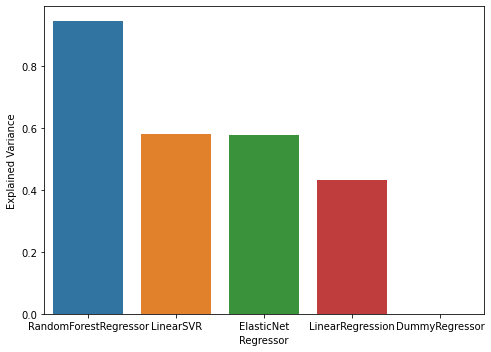

In [40]:
plt.figure(figsize=(7,5))
display(log_total_log.sort_values(by="Explained Variance", ascending=False))
sns.barplot(data=log_total_log.sort_values(by="Explained Variance", ascending=False), x="Regressor",y="Explained Variance")
plt.tight_layout()

# Analyse des résultats

Sur les 4 modèles testés, les modèles linéaires retournent de moins bonnes métriques en général. Si nous prenons en considération le score Explained Variance, qui aura du sens sur les modèles linéaires et non-linéaires, l'algorithme RandomForestRegressor offrent les meilleures performances la qualité des prédictions mais le temps de calcul est relativement plus long.

On observe également que le passage au log améliore significativement les résultats des modèles non-linéaires. En effet, cela se justifie par certaines features étant très déviée proche de 0.

In [41]:
display("Sans transformation",log_total.sort_values(by="Explained Variance", ascending=False))
display("Avec transformation au log", log_total_log.sort_values(by="Explained Variance", ascending=False))

'Sans transformation'

,Regressor,Explained Variance,R2 Score,Training Time,Best Hyperparameters
0,RandomForestRegressor,7.083991e-01,0.434471,74.600,"{'max_depth': 25, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}"
0,ElasticNet,5.889262e-01,0.414885,5.742,"{'alpha': 0.001, 'l1_ratio': 0.9, 'max_iter': 10}"
0,LinearSVR,5.554366e-01,0.410728,10.297,"{'C': 1.0, 'epsilon': 0, 'loss': 'squared_epsilon_insensitive', 'max_iter': 1000}"
0,LinearRegression,5.328286e-01,0.422355,1.371,"{'fit_intercept': False, 'normalize': True}"
0,DummyRegressor,7.401487e-18,-0.048786,0.042,{'strategy': 'median'}


'Avec transformation au log'

,Regressor,Explained Variance,R2 Score,Training Time,Best Hyperparameters
0,RandomForestRegressor,9.449372e-01,0.951200,69.718,"{'max_depth': 25, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}"
0,LinearSVR,5.818507e-01,0.656696,12.675,"{'C': 1.0, 'epsilon': 0, 'loss': 'squared_epsilon_insensitive', 'max_iter': 1000}"
0,ElasticNet,5.785381e-01,0.641238,4.965,"{'alpha': 0.001, 'l1_ratio': 0.30000000000000004, 'max_iter': 10}"
0,LinearRegression,4.323240e-01,0.656303,0.103,"{'fit_intercept': True, 'normalize': False}"
0,DummyRegressor,1.480297e-17,-0.006540,0.041,{'strategy': 'median'}


# Influence de la variable ENERGYSTARScore

L'ENERGYSTARScore donne un score de performance énergétique du bâtiment. Basé sur des données réelles et mesurées, le score ENERGY STAR évalue la performance de votre bâtiment dans son ensemble, en tenant compte de ses attributs physiques, de ses opérations et de la façon dont les personnes à l'intérieur l'utilisent. Plus le score est élevé, meilleur est la performance énergétique.

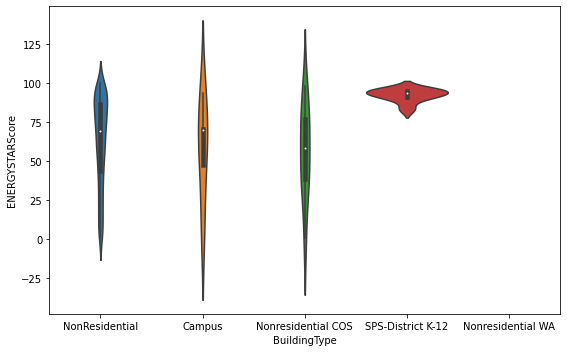

In [42]:
plt.figure(figsize=(8,5))
sns.violinplot(data=data_ESS,x="BuildingType",y='ENERGYSTARScore')
plt.tight_layout()
plt.show()

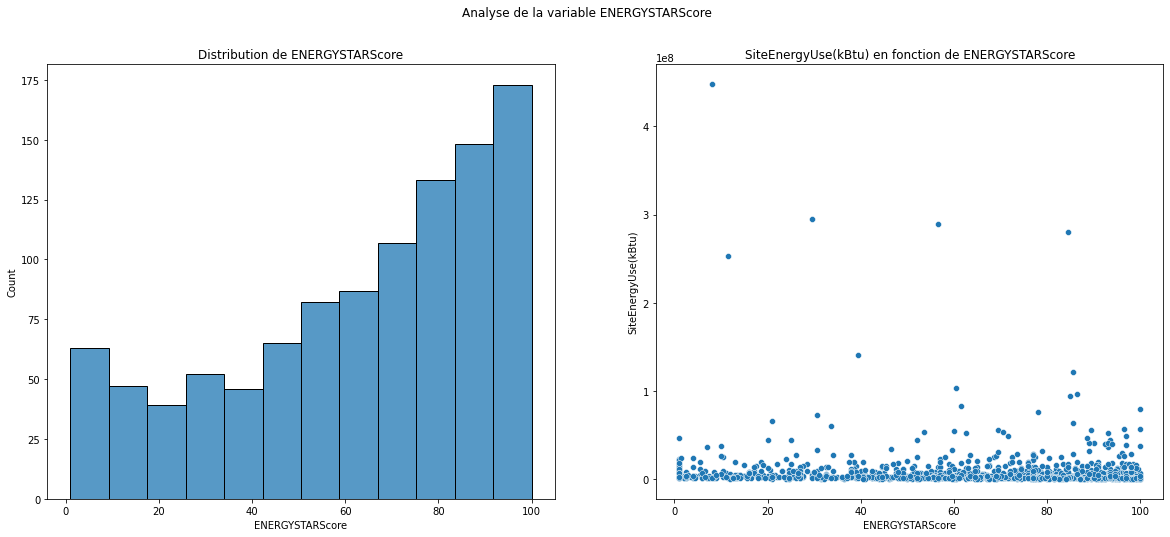

In [43]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.histplot(data=data_ESS, x='ENERGYSTARScore', ax=axes[0])
axes[0].set_title("Distribution de ENERGYSTARScore")
sns.scatterplot(data=data_ESS, y='SiteEnergyUse(kBtu)', x='ENERGYSTARScore', ax=axes[1])
axes[1].set_title("SiteEnergyUse(kBtu) en fonction de ENERGYSTARScore")
plt.suptitle("Analyse de la variable ENERGYSTARScore")
plt.show()

In [44]:
# Taux de remplissage
missing = ((1 - data_ESS.isnull().mean())*100).sort_values(ascending=False)
print("Taux de remplissage de ENERGYSTARScore : "+str(missing["ENERGYSTARScore"]))

Taux de remplissage de ENERGYSTARScore : 66.15873015873017


## Modélisation sans la variable ENERGYSTARScore avec le modèle choisi

RandomForestRegressor

Best Score to optimize: explained_variance = 0.9455444148382508
Best Hyperparameters: {'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}

****Results****
R2 Score: 0.9475166871817466
Training time: 70.2s


,Regressor,Explained Variance,R2 Score,Training Time,Best Hyperparameters
0,RandomForestRegressor,0.945544,0.947517,70.198,"{'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}"


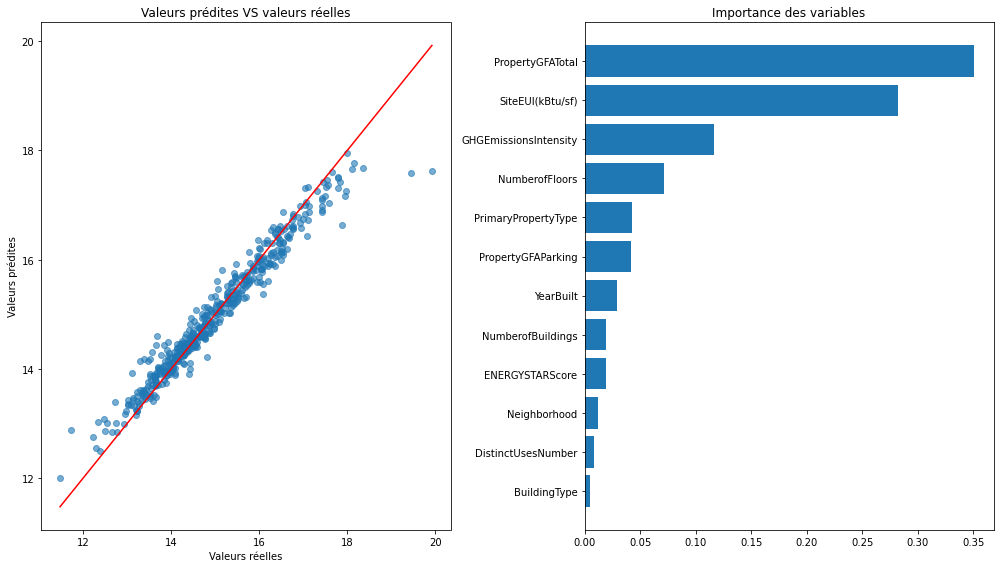

In [45]:
model_eval_log(ensemble.RandomForestRegressor(), X_train_std, y_train, X_test_std, y_test)

RandomForestRegressor

Best Score to optimize: explained_variance = 0.9502101615187987
Best Hyperparameters: {'max_depth': 25, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}

****Results****
R2 Score: 0.9545041904025215
Training time: 68.57s


,Regressor,Explained Variance,R2 Score,Training Time,Best Hyperparameters
0,RandomForestRegressor,0.95021,0.954504,68.567,"{'max_depth': 25, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}"


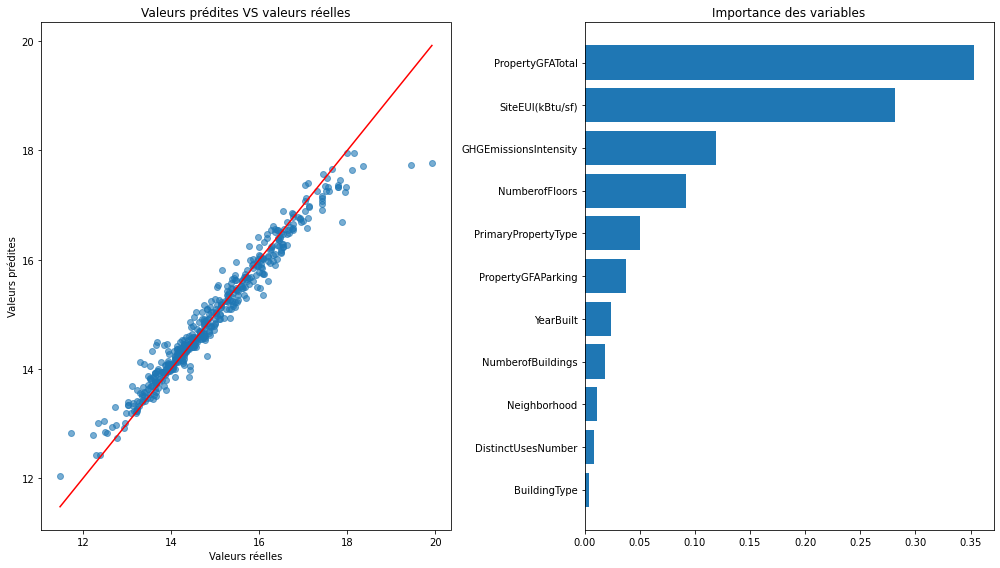

In [46]:
model_eval_log(ensemble.RandomForestRegressor(), X_train_std.drop(
    "ENERGYSTARScore", axis=1), y_train, X_test_std.drop("ENERGYSTARScore", axis=1), y_test)

On remarque que : 
- Le score est très légèrement plus élevé sans l'ENERGYSTARScore mais sans différence significative (différence = 0.001313).
- Lorsque qu'elle est prise en compte, cette variable n'est que la 11eme / 17 variable par ordre d'importance avec moins de 10% d'importance par rapport à la variable la plus importante.
- Elle ne présente pas une distribution normale, beaucoup de "bons scores", et pas vraiment de relation remarquable avec la variable SiteEnergyUse(kBtu).
- De plus, cette variable est peu renseignée avec un taux de remplissage de 66%.


Il est donc difficile de savoir si l'ajout de cette variable est rééllement significative. Dans notre cas, il n'y a pas vraiment de bénéfice vis à vis du coût de cet ENERGY STAR Score.

On choisit donc de ne pas la prendre en compte.

# Export des données prédites

## Learning curve

In [47]:
def plot_learning_curve(estimator, X, y, title, cv = model_selection.RepeatedKFold(
            n_splits=10, n_repeats=3, random_state=1),
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    train_sizes, train_scores, test_scores = sklearn.model_selection.learning_curve(estimator, X, y, cv = cv,
                                                            n_jobs=n_jobs, train_sizes= train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.figure(figsize=(7,5))
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color = "r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Train")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label=" Test")
    #if ylim is not None:
    #    plt.ylim(*ylim)
    plt.title (title, fontsize= 15, color= "darkblue")
    plt.legend(loc="best")
    plt.ylabel("score")
    plt.xlabel("train_size")
    return plt.show();

## Selection du meilleur modèle

In [50]:
def best_model_predictions(regressor, X_train, y_train, X_test, y_test):

    # List of Regressor Objects
    regressors = [
        regressor
    ]

    # Logging for Visual Comparison
    log_cols = ["Regressor", "Explained Variance",
                #"RMSE Loss", "MAE",
                "R2 Score", "Training Time", "Best Hyperparameters"]
    log = pd.DataFrame(columns=log_cols)

    if not('log_total_log' in globals()):
        global log_total_log
        log_total_log = pd.DataFrame(columns=log_cols)
    else:
        log_total_log = log_total_log.copy()

    for reg in regressors:

        name = reg.__class__.__name__

        # Hyperparameter tuning for each regressor
        if name == "LinearRegression":
            space = dict()
            space['fit_intercept'] = [True, False]
            space['normalize'] = [True, False]

        if name == "ElasticNet":
            space = dict()
            space['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
            space['l1_ratio'] = np.arange(0.0, 1.1, 0.1)
            space['max_iter'] = [10, 100, 1000]

        if name == "LinearSVR":
            space = dict()
            space['epsilon'] = [0, 0.01, 0.1, 0.5, 1, 2]
            space['C'] = np.logspace(-4, 2, 7)
            space['loss'] = ["epsilon_insensitive",
                             "squared_epsilon_insensitive"]
            space['max_iter'] = [10, 100, 1000]

        if name == "RandomForestRegressor":
            space = dict()
            space['max_features'] = ['sqrt', 'log2']
            space['max_depth'] = [5, 15, 25, 50]
            space['min_samples_split'] = [2, 5, 10]
            space['min_samples_leaf'] = [1, 2, 5, 10]

        if name == "GradientBoostingRegressor":
            space = dict()
            space['learning_rate'] = [0.001, 0.01, 0.1, 0.2, 0, 3]
            space['max_depth'] = [6, 10, 15, 20]
            space['n_estimators'] = [25, 50, 100, 500, 1000]

        if name == "DummyRegressor":
            space = dict()
            space['strategy'] = ['mean', 'median']

        # define cross validation
        cv = model_selection.RepeatedKFold(
            n_splits=10, n_repeats=3, random_state=1)

        # define scoring
        score = 'explained_variance'

        # define search
        #search = TransformedTargetRegressor(model_selection.GridSearchCV(
        #    reg, space, scoring=score, n_jobs=-1, cv=cv), func=np.log, inverse_func=np.exp)
        search = model_selection.GridSearchCV(
            reg, space, scoring=score, n_jobs=-1, cv=cv)

        # model fitting
        start_time = time.time()
        result = search.fit(X_train, y_train)
        training_time = time.time() - start_time

        print("="*30)
        print(name)
        print('\nBest Score to optimize: '+score+' = %s' %
              result.best_score_)
        print('Best Hyperparameters: %s' % result.best_params_)

        print('\n****Results****')
        predictions = result.predict(X_test)
        
        ###
        #display(predictions)
        ###

        # metrics
        #rmse = np.sqrt(sklearn.metrics.mean_squared_error(y_test, predictions))
        #mae = sklearn.metrics.mean_absolute_error(y_test, predictions)
        explained_variance = result.best_score_
        r2 = sklearn.metrics.r2_score(y_test, predictions)

        #print("Root Mean Squared Error: {}".format(rmse))
        #print("Mean Absolute Error: {}".format(mae))
        print("R2 Score: {}".format(r2))
        print("Training time: {}s".format(round(training_time, 2)))

        log_entry = pd.DataFrame(
            [[name, explained_variance,
              #rmse, mae,
              r2, round(training_time, 3), result.best_params_]], columns=log_cols)
        log = log.append(log_entry)
        log_total_log = log_total_log.append(log_entry)
        log_total_log.drop_duplicates(
            subset=['Regressor'], keep='last', inplace=True)
        
        #best_model = 

        print("="*30)

        display(log.sort_values(by='Explained Variance'))

        # plot valeurs réelles / valeurs prédites
        X_plot = [y_test.min(), y_test.max()]
        fig = plt.figure(figsize=(14, 8))
        plt.subplot(1, 2, 1)
        plt.scatter(y_test, predictions, alpha=.6)
        plt.plot(X_plot, X_plot, color='r')
        plt.title("Valeurs prédites VS valeurs réelles")
        plt.xlabel("Valeurs réelles")
        plt.ylabel("Valeurs prédites")

        # Features importance
        if name in ["LinearRegression", "ElasticNet", "LinearSVR"]:
            feature_importance = np.abs(
            search.best_estimator_.coef_)
            sorted_idx = np.argsort(feature_importance)
            pos = np.arange(sorted_idx.shape[0]) + .5
            plt.subplot(1, 2, 2)
            plt.barh(pos, feature_importance[sorted_idx], align='center')
            plt.yticks(pos, np.array(X_train.columns)[sorted_idx])
            plt.title('Importance des variables')

        if name in ["RandomForestRegressor", "GradientBoostingRegressor"]:
            feature_importance = search.best_estimator_.feature_importances_
            sorted_idx = np.argsort(feature_importance)
            pos = np.arange(sorted_idx.shape[0]) + .5
            plt.subplot(1, 2, 2)
            plt.barh(pos, feature_importance[sorted_idx], align='center')
            plt.yticks(pos, np.array(X_train.columns)[sorted_idx])
            plt.title('Importance des variables')

        fig.tight_layout()
        plt.show()
        
        # Learning Curve
        plot_learning_curve(search.best_estimator_,X_train,y_train, 'Learning Curve')
        #print(search.regressor_.best_estimator_)
        #print(result.regressor_)
        
        
        # Predictions non transformées
        return np.exp(predictions)
        
        

RandomForestRegressor

Best Score to optimize: explained_variance = 0.9497588503803823
Best Hyperparameters: {'max_depth': 50, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}

****Results****
R2 Score: 0.9539626700765486
Training time: 68.18s


,Regressor,Explained Variance,R2 Score,Training Time,Best Hyperparameters
0,RandomForestRegressor,0.949759,0.953963,68.176,"{'max_depth': 50, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}"


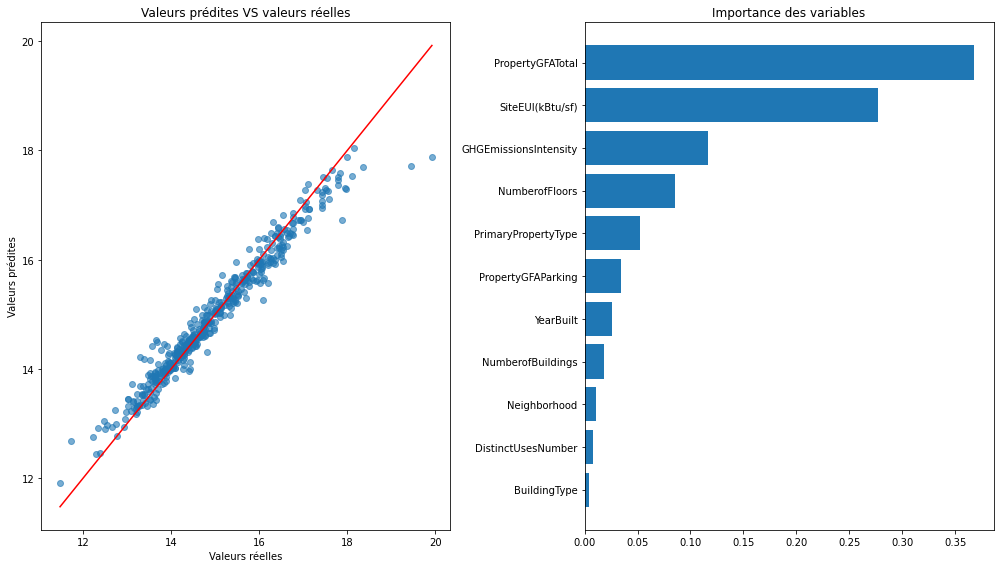

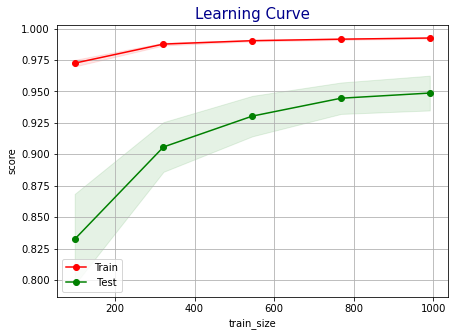

In [51]:
prediction = best_model_predictions(ensemble.RandomForestRegressor(), X_train_std.drop('ENERGYSTARScore', axis=1)
                       , y_train, X_test_std.drop('ENERGYSTARScore', axis=1)
                       , y_test)

In [52]:
prediction

array([ 3227431.19743963,  2775757.19848083,  8685900.95439515,
        3740785.56733925,  1699841.09502159,  1817625.99014424,
       13741801.81121663,  3395626.40169275, 13079501.41015872,
        8417185.46252768, 13523339.07416528,  2629330.87565875,
        2054539.32152352,  6003638.60775079,  2244510.55562461,
        8877273.74906811,  3629184.85572182,   460198.09633528,
        6102953.81821756,  6278334.80656424, 12291784.36364407,
        1287418.05849811, 18216862.59644283,   594153.6996155 ,
         917538.26774399,   998074.84539402,   412300.77388629,
        2022218.43101406,  1631281.44352024,  1541250.69877928,
        5066571.43298041,  4769188.2297103 , 19136813.14830299,
        1015885.98596779,   754918.7255999 ,  1397860.74542993,
        3240475.75557388,  1459924.1696892 ,  4074830.93821194,
        1210359.3062748 ,  1788806.20808281,  1833580.69888014,
       15674222.8886921 , 20745140.4027555 , 48546787.03483967,
        1548889.99560596,  1357112.13632

In [53]:
prediction.tofile('SiteEnergyUse(kBtu)_prediction.csv', sep = ';')

# Synthèse et conclusion

Synthèse : 
- Création d’un dataset exploitable
- Analyse exploratoire
- Preprocessing
- Modelisation et optimisation
- Choix d’un modèle final et vérification de l’apprentissage 

Conlusion :
- Possibilité de prédire la consommation énergétique pour éviter les relevés couteux.
- Evaluation de l’intérêt d’un « green score » pas si pertinent pour l’anticipation de la consommation.

Choix des variables explicatives : 
1. On connait le phénomène très bien
2. On cherche les variables les plus corrélées à la variable qu'on cherche à prédire
